<a href="https://colab.research.google.com/github/Dhamu785/AI-scratch/blob/main/tree/main/TensorFlow/1_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reference Links**
- [Tensorflow tutorial](https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub)
- [Tensorflow hub](https://www.tensorflow.org/hub)

In [ ]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

import datetime

%load_ext tensorboard
import pathlib
import os
import cv2

## **Load model ▶▶▶▶▶▶▶▶▶▶▶**

In [ ]:
# @title  { form-width: "30%" }
# @title  { form-width: "20%" }
# @title  { form-width: "40%" }
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

classifier_model = mobilenet_v2 # @param ["mobilenet_v2", "inception_v3"] {type:"raw"}

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

## **Load label ▶▶▶▶▶▶▶▶▶▶▶**

In [ ]:
labels_path = tf.keras.utils.get_file('/content/drive/MyDrive/Colab Notebooks YouTube tutorials/8 Tensorflow and keras/Code basics/16 Transfer learning/ImageNetLabels.txt',
                                      'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

In [ ]:
labels = open("/content/drive/MyDrive/Colab Notebooks YouTube tutorials/8 Tensorflow and keras/Code basics/16 Transfer learning/ImageNetLabels.txt", "r")
name = labels.readlines()
print(name[1])

tench



## **Testing ▶▶▶▶▶▶▶▶▶▶▶**

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [ ]:
[45, 78, 99] + [78, 56]

[45, 78, 99, 78, 56]

## **Image from web prediction ▶▶▶▶▶▶▶▶▶▶▶**

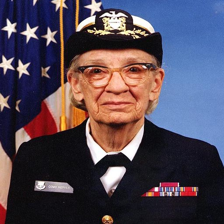

In [ ]:
grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper

In [ ]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

In [ ]:
result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape

1/1 [==============================] - 8s 8s/step


(1, 1001)

In [ ]:
print(name[np.argmax(result)])

military uniform



In [ ]:
grace_hopper[np.newaxis].shape

(1, 224, 224, 3)

## **Image from local prediction ▶▶▶▶▶▶▶▶▶▶▶**

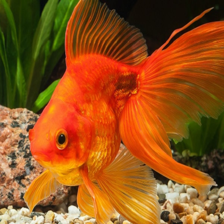

In [ ]:
resized_gold_fish = Image.open("/content/drive/MyDrive/Colab Notebooks YouTube tutorials/8 Tensorflow and keras/Code basics/16 Transfer learning/goldfish.jpg").resize(IMAGE_SHAPE)
resized_gold_fish

In [ ]:
gold_fish = np.array(resized_gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [ ]:
# gf = np.array([gold_fish])
# or
gf = gold_fish[np.newaxis]

In [ ]:
gf.shape

(1, 224, 224, 3)

In [ ]:
type(gf)

numpy.ndarray

In [ ]:
result = classifier.predict(gf)
result.shape

1/1 [==============================] - 0s 35ms/step


(1, 1001)

In [ ]:
name[np.argmax(result)]

'goldfish\n'

## **Flower dataset ▶▶▶▶▶▶▶▶▶▶▶**

In [ ]:
data_file = tf.keras.utils.get_file(fname='flower_photos',
                                    cache_dir='/content/drive/MyDrive/Colab Notebooks YouTube tutorials/8 Tensorflow and keras/Code basics/16 Transfer learning/',
                                    origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',untar=True)

228813984/228813984 [==============================] - 3s 0us/step


In [ ]:
path = pathlib.Path("/content/drive/MyDrive/Colab Notebooks YouTube tutorials/8 Tensorflow and keras/Code basics/16 Transfer learning/datasets/flower_photos")
path

PosixPath('/content/drive/MyDrive/Colab Notebooks YouTube tutorials/8 Tensorflow and keras/Code basics/16 Transfer learning/datasets/flower_photos')

In [ ]:
len(list(path.glob('*/*.jpg')))

3670

In [ ]:
flowers_name = os.listdir(path)
flowers_name.remove("LICENSE.txt")
flowers_name

['tulips', 'daisy', 'dandelion', 'sunflowers', 'roses']

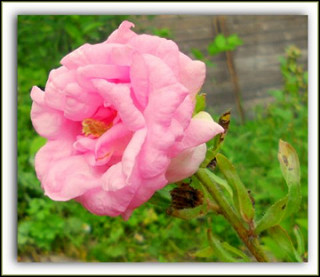

In [ ]:
Image.open(list(path.glob(flowers_name[4]+'/*.jpg'))[1])

In [ ]:
img_labels = dict()
for i,j in enumerate(flowers_name):
    img_labels[j] = i

img_labels

{'tulips': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'roses': 4}

In [ ]:
img_paths = dict()
for i in flowers_name:
    img_paths[i] = list(path.glob(i+'/*'))

img_paths['roses'][1]

PosixPath('/content/drive/MyDrive/Colab Notebooks YouTube tutorials/8 Tensorflow and keras/Code basics/16 Transfer learning/datasets/flower_photos/roses/7409458444_0bfc9a0682_n.jpg')

In [ ]:
x,y = [],[]
for flower,path in img_paths.items():
    for p in path[:500]:
        img_data = cv2.imread(str(p))
        resized = cv2.resize(img_data,(224,224))
        x.append(resized)
        y.append(img_labels[flower])

In [ ]:
x[1].shape

(224, 224, 3)

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

print(f"x_train: {len(x_train)}")
print(f"x_test: {len(x_test)}")


x_train: 2000
x_test: 500


In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
x_train_scaled[0].shape

(224, 224, 3)

In [ ]:
type(x_train_scaled[1])

numpy.ndarray

In [ ]:
x_train_scaled[0][1][1]

array([0.01568627, 0.03137255, 0.05098039])

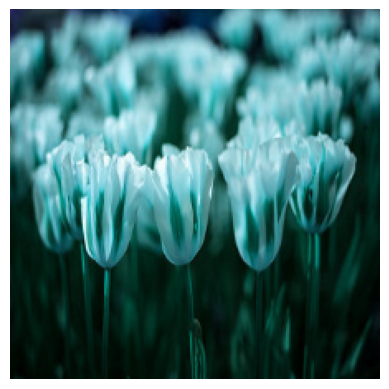

In [ ]:
plt.axis('off')
plt.imshow(x[1])
plt.show()

## **Predictions**

In [ ]:
type(np.array([x_train_scaled[0],x_train_scaled[1]]))

numpy.ndarray

In [ ]:
type(x_train_scaled[0][np.newaxis])

numpy.ndarray

In [ ]:
predicted = classifier.predict(np.array([x_train_scaled[0],x_train_scaled[1]]))

1/1 [==============================] - 1s 896ms/step


In [ ]:
print(name[np.argmax(predicted[1])])

daisy



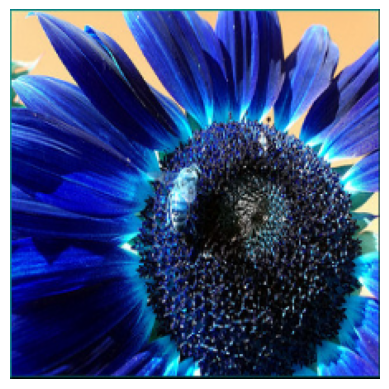

In [ ]:
plt.axis('off')
plt.imshow(x_train_scaled[1])
plt.show()

## **Model training with feature vector**

In [ ]:
# @title Default title text { run: "auto", vertical-output: true, form-width: "500px" }
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
inception_v3 = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
feature_vect = mobilenet_v2 # @param ["mobilenet_v2", "inception_v3"] {type:"raw"}


In [ ]:
feature_extractor_layer = hub.KerasLayer(feature_vect,input_shape=(224, 224, 3),trainable=False)

In [ ]:
no_of_flowers = 5
model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(no_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(x_train_scaled, y_train, epochs=20)

Epoch 1/20
63/63 [==============================] - 12s 94ms/step - loss: 0.9187 - acc: 0.6535
Epoch 2/20
63/63 [==============================] - 6s 89ms/step - loss: 0.4565 - acc: 0.8375
Epoch 3/20
63/63 [==============================] - 5s 79ms/step - loss: 0.3453 - acc: 0.8850
Epoch 4/20
63/63 [==============================] - 6s 92ms/step - loss: 0.2865 - acc: 0.9130
Epoch 5/20
63/63 [==============================] - 4s 63ms/step - loss: 0.2431 - acc: 0.9300
Epoch 6/20
63/63 [==============================] - 7s 103ms/step - loss: 0.2140 - acc: 0.9370
Epoch 7/20
63/63 [==============================] - 5s 86ms/step - loss: 0.1925 - acc: 0.9485
Epoch 8/20
63/63 [==============================] - 5s 83ms/step - loss: 0.1687 - acc: 0.9530
Epoch 9/20
63/63 [==============================] - 5s 83ms/step - loss: 0.1486 - acc: 0.9700
Epoch 10/20
63/63 [==============================] - 5s 88ms/step - loss: 0.1342 - acc: 0.9750
Epoch 11/20
63/63 [==============================] - 4s 6

In [ ]:
model.evaluate(x_test,y_test)

16/16 [==============================] - 4s 150ms/step - loss: 2.6974 - acc: 0.2280


[2.6974425315856934, 0.2280000001192093]

In [ ]:
res = model.predict(np.array([x_test[12]]))


1/1 [==============================] - 1s 648ms/step


In [ ]:
img_labels

{'tulips': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'roses': 4}

In [ ]:
[np.argmax(res)]

[1]

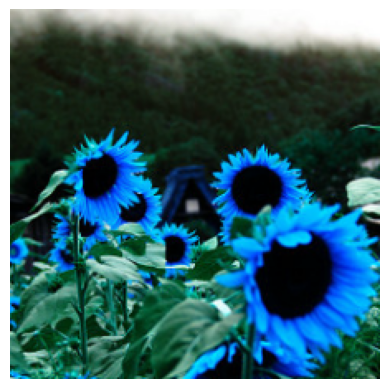

In [ ]:
plt.axis('off')
plt.imshow(x_test[12])
plt.show()